In [7]:
# DASC 511 Project
# David M Vermillion
# 28 August 2022

In [8]:
# File initialization

!pip install -r requirements.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import report_util
from astropy.io.votable import parse_single_table
from varname import nameof

In [9]:
# Functions

def shortTable(dataframe: pd.DataFrame(), column_name: str()):
    # Create new dataframe for table
    # https://stackoverflow.com/a/65756509/13801562
    # https://stackoverflow.com/a/29373853/13801562
    dataframe_name = nameof(dataframe)
    table_addition = '_table'
    dictionary = {}
    dictionary[dataframe_name + table_addition] = pd.DataFrame(dataframe)

    # Transform dataframe
    # Rename column
    dictionary[dataframe_name + table_addition].columns = [column_name]
    # Obtain summary statistics
    dictionary[dataframe_name + table_addition] = dictionary[dataframe_name + table_addition].agg({column_name: ["min", "max", "median", "mean", "std"]})
    # Change dataframe to be readable into table
    dictionary[dataframe_name + table_addition] = dictionary[dataframe_name + table_addition][column_name]

    return dictionary[dataframe_name + table_addition]

In [10]:
# Import

votable = parse_single_table("PSCompPars_2022.08.14_13.46.20.votable")

In [11]:
# Data Transformations

## Unpack table columns desired for this report
## https://numpy.org/doc/stable/reference/maskedarray.generic.html#accessing-only-the-valid-entries
## https://www.delftstack.com/howto/numpy/numpy-convert-string-array-to-float-array/
discovery_year = votable.array['disc_year'].compressed()
discovery_year = np.asarray(discovery_year, dtype = float)
distance = votable.array['sy_dist'].compressed()
earth_radius = votable.array['pl_rade'].compressed()
orbit_period = votable.array['pl_orbper'].compressed()
planet_mass_earth = votable.array['pl_bmasse'].compressed()
planet_orbit_eccentricity = votable.array['pl_orbeccen'].compressed()
planet_orbit_eccentricity = np.sort(planet_orbit_eccentricity)
semi_major_axis = votable.array['pl_orbsmax'].compressed()
semi_major_axis = np.sort(semi_major_axis)
star_radius = votable.array['st_rad'].compressed()
star_temperature = votable.array['st_teff'].compressed()

# Planet counts
# https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-94.php
planets_in_system = votable.array['sy_pnum'].compressed()
planets_in_system = np.asarray(planets_in_system, dtype = float)
# planets_unique is uncalled. However, its function is to force planets_count to be a list of count values instead of a tuple.
# Therefore the variable is functional for this iteration.
planets_unique, planets_count = np.unique(planets_in_system, return_counts = True)
labels_planet_counts = ['1 Planet', '2 Planets', '3 Planets', '4-8 Planets']
planets_count[3] = planets_count[3] + planets_count[4] + planets_count[5] + planets_count[6] + planets_count[7]
planets_count = np.delete(planets_count, [4, 5, 6, 7], 0)

# Star counts
# https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-94.php
stars_in_system = votable.array['sy_snum'].compressed()
stars_in_system = np.asarray(stars_in_system, dtype = float)
# stars_unique is uncalled. However, its function is to force stars_count to be a list of count values instead of a tuple.
# Therefore the variable is functional for this iteration.
stars_unique, stars_count = np.unique(stars_in_system, return_counts = True)
labels_star_counts = ['1 Star', '2 Stars', '3 or 4 Stars']
stars_count[2] = stars_count[2] + stars_count[3]
stars_count = np.delete(stars_count, 3, 0)

# Create table for report
# Initialize table
table = pd.DataFrame({'discovery_year': [], 'distance': [], 'earth_radius': [], 'orbit_period': [], 'planet_mass_earth': [], 
        'planet_orbit_eccentricity': [], 'planets_in_system': [], 'stars_in_system': [], 'semi_major_axis': [], 
        'star_radius': [], 'star_temperature': []})

# Table Transformations
# These transformations are performed manually to sidestep debugging a for loop or dictionary comprehension object.
# This section could be cleaned up in a future version.
table['discovery_year'] = shortTable(discovery_year, 'discovery_year')
table['distance'] = shortTable(distance, 'distance')
table['earth_radius'] = shortTable(earth_radius, 'earth_radius')
table['orbit_period'] = shortTable(orbit_period, 'orbit_period')
table['planet_mass_earth'] = shortTable(planet_mass_earth, 'planet_mass_earth')
table['planet_orbit_eccentricity'] = shortTable(planet_orbit_eccentricity, 'planet_orbit_eccentricity')
table['planets_in_system'] = shortTable(planets_in_system, 'planets_in_system')
table['semi_major_axis'] = shortTable(semi_major_axis, 'semi_major_axis')
table['star_radius'] = shortTable(star_radius, 'star_radius')
table['star_temperature'] = shortTable(star_temperature, 'star_temperature')
table['stars_in_system'] = shortTable(stars_in_system, 'stars_in_system')
# This long block renames the index and column names. It also transposes into the desired table format and rounds to 2 decimal places.
table = table.rename(columns = {'discovery_year': 'Discovery Year', 'distance': 'Distance (pc)', 'earth_radius': 'Earth Radius Multiples', 
                'orbit_period': 'Orbit Period (days)', 'planet_mass_earth': 'Planet Mass, Earth-Equivalent', 
                'planet_orbit_eccentricity': 'Planet Orbit Eccentricity', 'planets_in_system': 'Planets in System', 
                'semi_major_axis': 'Semi-Major Axis (AU)', 'star_radius': 'Stellar Radius (Sol)', 
                'star_temperature': 'Stellar Temperature (K)', 'stars_in_system': 'Stars in System'},
                index = {'min': 'Minimum', 'max': 'Maximum', 'median': 'Median', 'mean': 'Mean',
                        'std': 'Standard Deviation'}).transpose().round(2)
table['Description'] = ['Discovery Year', 'Distance from Earth (pc)', 'Earth Radius Multiples', 'Planet Orbit Period (days)',
                       'Planet Mass, Earth-Equivalent', 'Planet Orbit Eccentricity', 'Planets in System', 'Stars in System',
                       'Semi-Major Axis (AU)', 'Stellar Radius (Sol)', 'Stellar Temperature (K)']


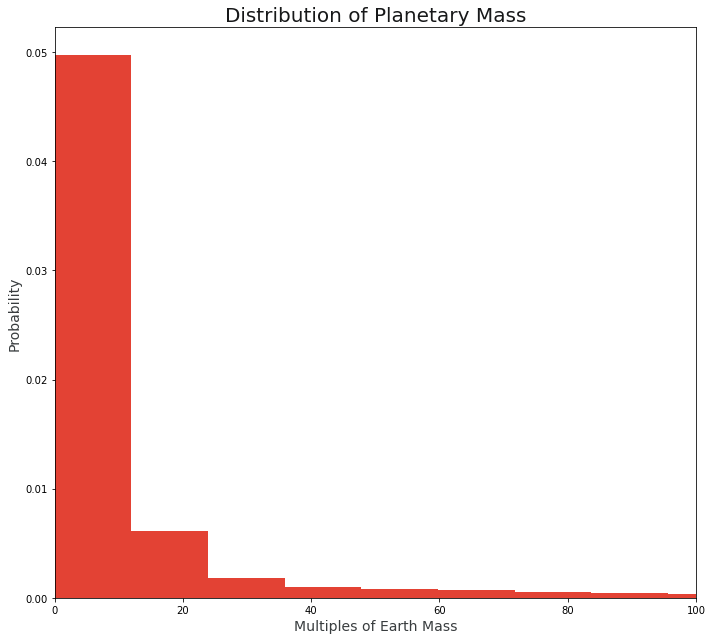

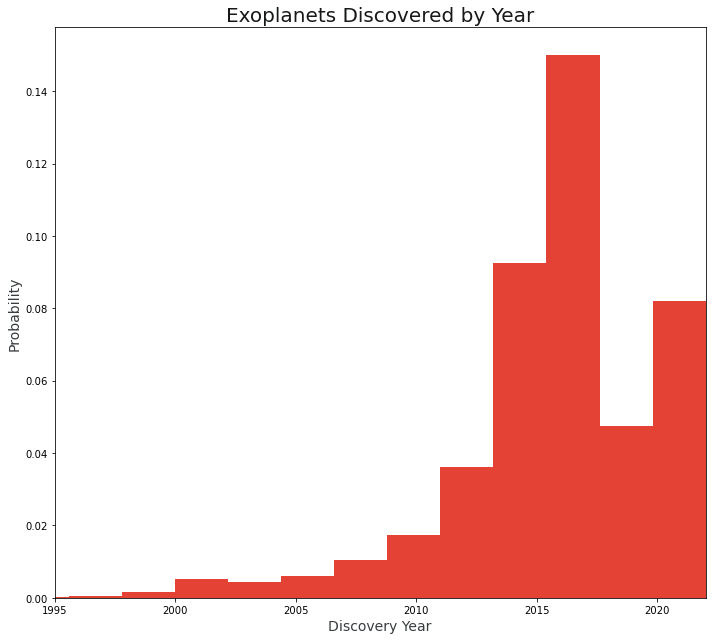

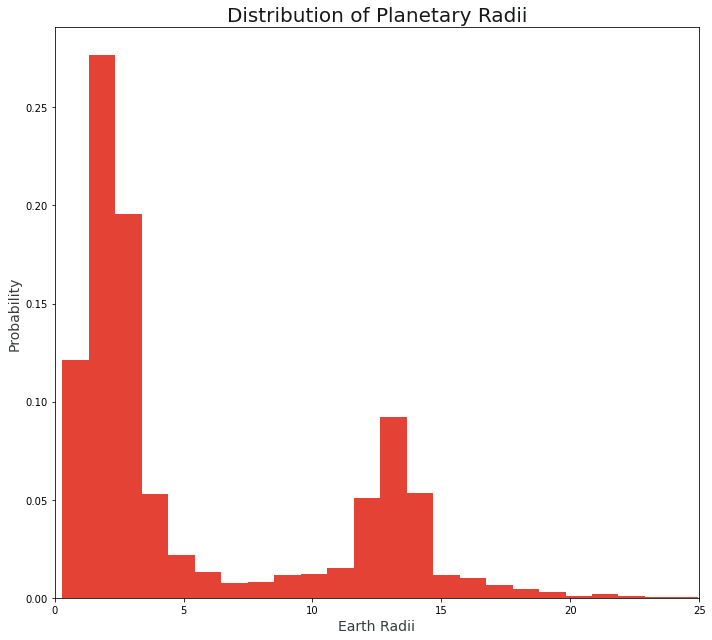

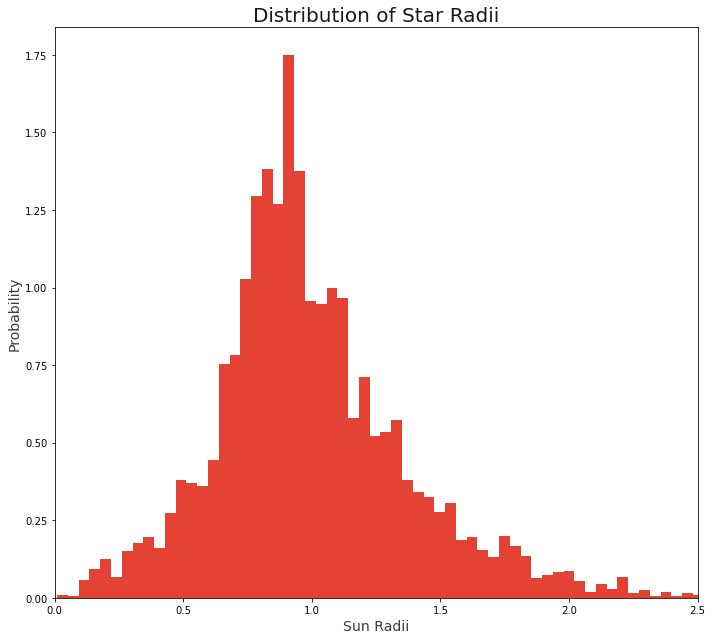

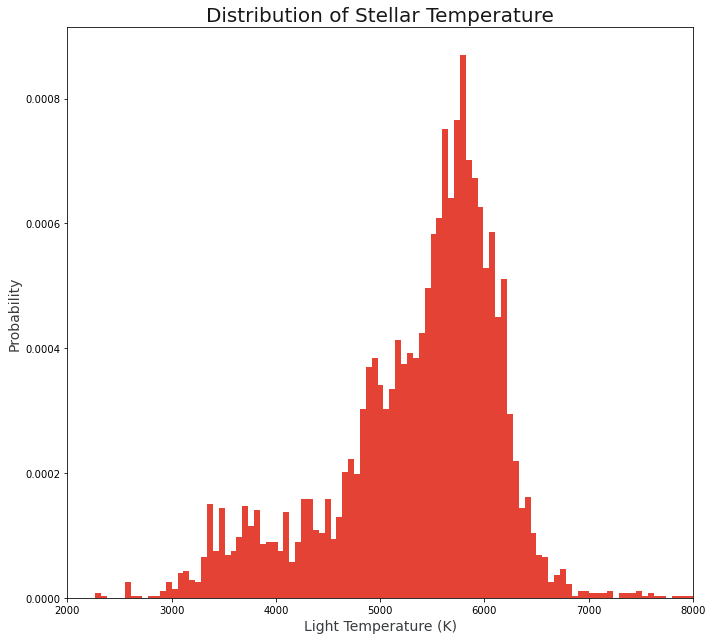

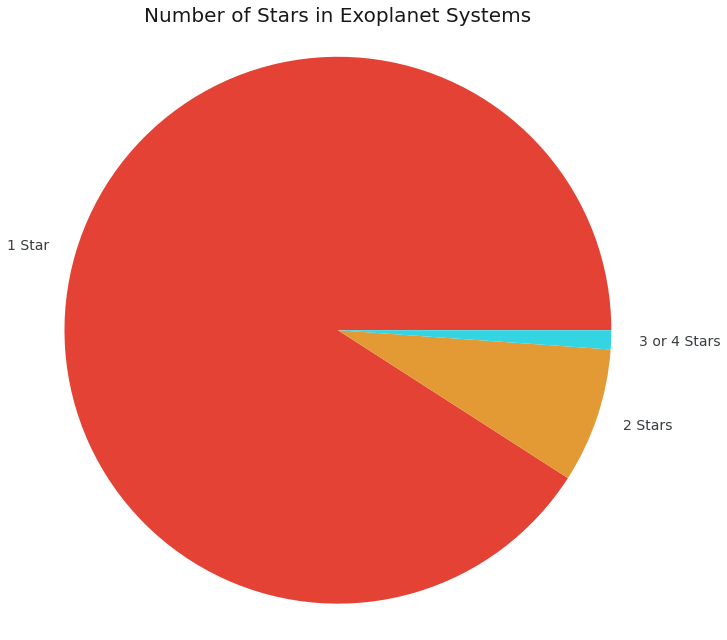

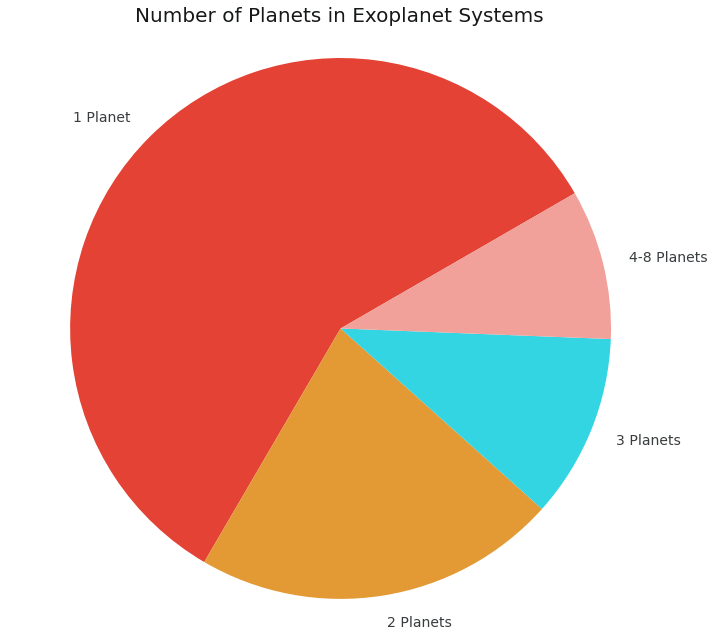

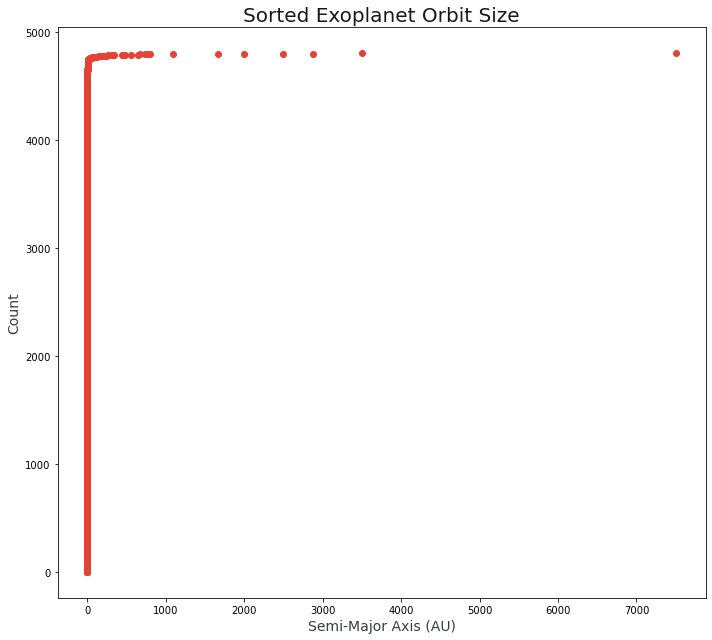

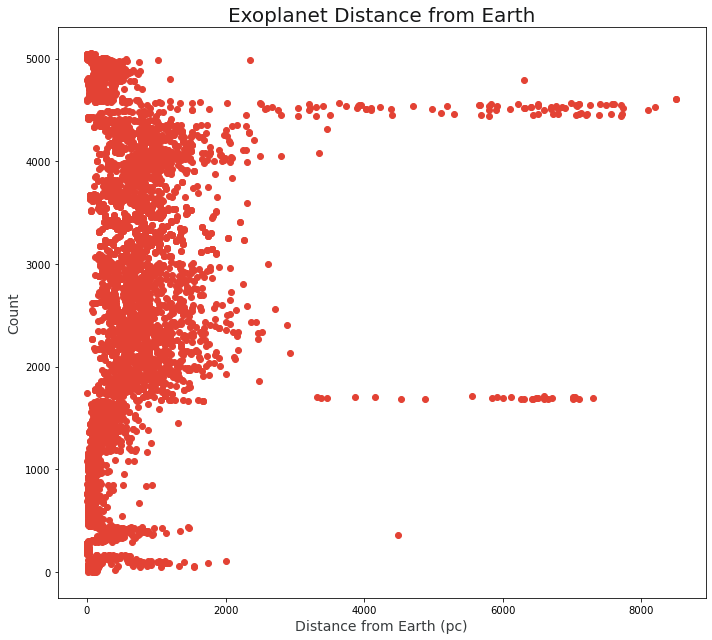

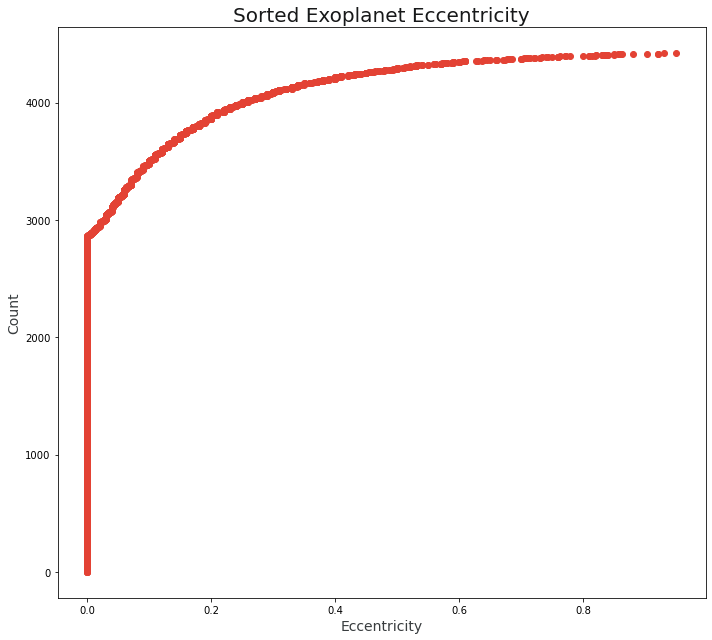

In [12]:
# Report Creation
def generate_report(votable):
    report = report_util.Report("Properties of Exoplanets")

    section = report.add_section("Background")

    paragraph = section.add_paragraph()
    
    paragraph.append(f"Exoplanets are planetary bodies that exist outside of our solar system. ")
    paragraph.append(f"This report examines statistical data from the collection of all known exoplanets. ")
    paragraph.append(f"Please note that the GUI-generated SQL query where this data came from is incomplete. ")
    paragraph.append(f"However, with that understanding, this report presents some interesting findings. ")
    paragraph.append(f"The report starts with histogram distributions, presents some part-of-the-whole data in ")
    paragraph.append(f"pie charts (to work within the constraints of the report generator being used), provides ")
    paragraph.append(f"some scatterplots, and finishes off with a table of summary statistics. ")
    
    paragraph_2 = section.add_paragraph()
    
    paragraph_2.append(f"Some known constraints with this HTML report generator include the following: \n")
    paragraph_2.append(f"1) Requires matplotlib to generate chart objects. \n")
    paragraph_2.append(f"2) Cannot fully extend matplotlib to allow for complete customization \n")
    paragraph_2.append(f"3) Can only use standard matplotlib chart objects (I.e. I can't customize a stacked bar chart in lieu of a pie chart). \n")
    paragraph_2.append(f"4) Cannot create standard ordered lists (observe this one). \n")
    
    ##########################################################################
    # Probability Distributions
    ##########################################################################
    
    section = report.add_section("Probability Distributions")    

    paragraph_3 = section.add_paragraph()
    
    # Figure 1
    figure_1 = section.add_figure()
    figure_1.caption = "Planetary Mass Histogram"
    ax = figure_1.matplotlib_figure.add_subplot(1,1,1)
    # rcParams changes default size for rest of report
    # In a notebook, it often needs to be run in a separate block before it will apply to the rest of the code
    # https://www.geeksforgeeks.org/change-plot-size-in-matplotlib-python/
    plt.rcParams['figure.figsize'] = [10, 9]
    ax.hist(planet_mass_earth, 20000, density = True, facecolor = '#E34234')
    ax.set_xlabel('Multiples of Earth Mass', fontsize = 14).set_color('#393d3f')
    ax.set_ylabel('Probability', fontsize = 14).set_color('#393d3f')
    ax.set_title('Distribution of Planetary Mass', fontsize = 20).set_color('#171819')
    ax.set_xlim(0, 100)
    figure_1.matplotlib_figure.tight_layout()

    paragraph_3.append_cross_reference(figure_1)
    paragraph_3.append(f" shows the histogram distribution of planetary mass. ")

    # Figure 2
    figure_2 = section.add_figure()
    figure_2.caption = "Discovery Year Histogram"
    ax = figure_2.matplotlib_figure.add_subplot(1,1,1)
    ax.hist(discovery_year, 15, density = True, facecolor = '#E34234')
    ax.set_xlabel('Discovery Year', fontsize = 14).set_color('#393d3f')
    ax.set_ylabel('Probability', fontsize = 14).set_color('#393d3f')
    ax.set_title('Exoplanets Discovered by Year', fontsize = 20).set_color('#171819')
    ax.set_xlim(1995, 2022)
    figure_2.matplotlib_figure.tight_layout()

    paragraph_3.append_cross_reference(figure_2)
    paragraph_3.append(f" shows the histogram distribution of years exoplanets were discovered. ")
    
    # Figure 3
    figure_3 = section.add_figure()
    figure_3.caption = "Exoplanet Radii Histogram"
    ax = figure_3.matplotlib_figure.add_subplot(1,1,1)
    ax.hist(earth_radius, 75, density = True, facecolor = '#E34234')
    ax.set_xlabel('Earth Radii', fontsize = 14).set_color('#393d3f')
    ax.set_ylabel('Probability', fontsize = 14).set_color('#393d3f')
    ax.set_title('Distribution of Planetary Radii', fontsize = 20).set_color('#171819')
    ax.set_xlim(0, 25)
    figure_3.matplotlib_figure.tight_layout()

    paragraph_3.append_cross_reference(figure_3)
    paragraph_3.append(f" shows the histogram distribution of exoplanet radii as multiples of Earth's radius.")
    paragraph_3.append(f" Two clumps show around Earth's radius and 13x Earth's radius. ")

    # Figure 4
    # https://stats.stackexchange.com/questions/4220/can-a-probability-distribution-value-exceeding-1-be-ok
    # I wasn't expecting a histogram to have such a large point value at first
    figure_4 = section.add_figure()
    figure_4.caption = "Exoplanet Stellar Radii Histogram"
    ax = figure_4.matplotlib_figure.add_subplot(1,1,1)
    ax.hist(star_radius, 2000, density = True, facecolor = '#E34234')
    ax.set_xlabel('Sun Radii', fontsize = 14).set_color('#393d3f')
    ax.set_ylabel('Probability', fontsize = 14).set_color('#393d3f')
    ax.set_title('Distribution of Star Radii', fontsize = 20).set_color('#171819')
    ax.set_xlim(0, 2.5)
    figure_4.matplotlib_figure.tight_layout()

    paragraph_3.append_cross_reference(figure_4)
    paragraph_3.append(f" shows the histogram distribution of exoplanet solar radii as multiples of our Sun's radius.")
    paragraph_3.append(f" Most stars are a little smaller than our own, with a very long distribution tail out to several multiples of our Sun's radius. ")

    # Figure 5
    figure_5 = section.add_figure()
    figure_5.caption = "Stellar Temperature Histogram"
    ax = figure_5.matplotlib_figure.add_subplot(1,1,1)
    ax.hist(star_temperature, 1000, density = True, facecolor = '#E34234')
    ax.set_xlabel('Light Temperature (K)', fontsize = 14).set_color('#393d3f')
    ax.set_ylabel('Probability', fontsize = 14).set_color('#393d3f')
    ax.set_title('Distribution of Stellar Temperature', fontsize = 20).set_color('#171819')
    ax.set_xlim(2000, 8000)
    figure_5.matplotlib_figure.tight_layout()

    paragraph_3.append_cross_reference(figure_5)
    paragraph_3.append(f" shows the histogram distribution of stellar temperatures.")
    paragraph_3.append(f" Most stars appear centered around ~5800 Kelvin. ")
    
    ##########################################################################
    # Percentage Distributions
    ##########################################################################
    
    section = report.add_section("Percentage Distributions")
    
    paragraph_4 = section.add_paragraph()
    
    paragraph_4.append(f" Looking at percentages, 90% of exoplanets are in a system with only one star. ")
    
    # Figure 6
    figure_6 = section.add_figure()
    figure_6.caption = "Number of Stars in Discovered Exoplanet Systems"
    ax = figure_6.matplotlib_figure.add_subplot(1,1,1)
    ax.pie(stars_count, labels = labels_star_counts, textprops = {'fontsize': 14, 'color': '#393d3f'},
          colors = ['#e34234', '#e39a34', '#34d5e3', '#e39a34'])
    ax.axis('equal')
    ax.set_title('Number of Stars in Exoplanet Systems', fontsize = 20).set_color('#171819')
    figure_6.matplotlib_figure.tight_layout()

    paragraph_4.append_cross_reference(figure_6)
    paragraph_4.append(f" shows that most exoplanets orbit around one star.")
    paragraph_4.append(f" However, there are 2, 3, and 4 star systems with planets orbiting them.")
    paragraph_4.append(f" Additionally, because of data quality issues with this dataset, while some rogue planets do not orbit a star, those were not included in the exported data for this report. ")

    # Figure 7
    figure_7 = section.add_figure()
    figure_7.caption = "Number of Planets in Discovered Exoplanet Systems"
    ax = figure_7.matplotlib_figure.add_subplot(1,1,1)
    ax.pie(planets_count, labels = labels_planet_counts, textprops = {'fontsize': 14, 'color': '#393d3f'}, 
           startangle = 30, colors = ['#e34234', '#e39a34', '#34d5e3', '#f1a19a'])
    ax.axis('equal')
    ax.set_title('Number of Planets in Exoplanet Systems', fontsize = 20).set_color('#171819')
    figure_7.matplotlib_figure.tight_layout()

    paragraph_4.append_cross_reference(figure_7)
    paragraph_4.append(f" shows that most exoplanets exist by themselves in their planetary system.")
    paragraph_4.append(f" However, there are systems with 2 or more planets orbiting them. ")

    ##########################################################################
    # Scatterplots
    ##########################################################################

    section = report.add_section("Scatterplots")
    
    paragraph_5 = section.add_paragraph()
    
    paragraph_5.append(f" Some of the highlighted objects are best viewed as scatterplots. ")
    
    # Figure 8
    figure_8 = section.add_figure()
    figure_8.caption = "Exoplanet Orbit Size where 1 dot = 1 Planet"
    ax = figure_8.matplotlib_figure.add_subplot(1,1,1)
    ax.scatter(semi_major_axis, range(len(semi_major_axis)), color = '#E34234')
    ax.set_ylabel('Count', fontsize = 14).set_color('#393d3f')
    ax.set_xlabel('Semi-Major Axis (AU)', fontsize = 14).set_color('#393d3f')
    ax.set_title('Sorted Exoplanet Orbit Size', fontsize = 20).set_color('#171819')
    figure_8.matplotlib_figure.tight_layout()
    
    paragraph_5.append_cross_reference(figure_8)
    paragraph_5.append(f" shows that most exoplanets' orbit sizes are within an order of magnitude to Earth's orbit (1 AU). ")

    # Figure 9
    figure_9 = section.add_figure()
    figure_9.caption = "Most Discovered Exoplanets are within 2,000 Parsecs of Earth"
    ax = figure_9.matplotlib_figure.add_subplot(1,1,1)
    ax.scatter(distance, range(len(distance)), color = '#E34234')
    ax.set_ylabel('Count', fontsize = 14).set_color('#393d3f')
    ax.set_xlabel('Distance from Earth (pc)', fontsize = 14).set_color('#393d3f')
    ax.set_title('Exoplanet Distance from Earth', fontsize = 20).set_color('#171819')
    figure_9.matplotlib_figure.tight_layout()

    paragraph_5.append_cross_reference(figure_9)
    paragraph_5.append(f" shows that most exoplanets are within 2,000 parsecs of Earth, with some significantly further out. ")

    # Figure 10
    figure_10 = section.add_figure()
    figure_10.caption = "Most Exoplanets Have (nearly) Circular Orbits"
    ax = figure_10.matplotlib_figure.add_subplot(1,1,1)
    ax.scatter(planet_orbit_eccentricity, range(len(planet_orbit_eccentricity)), color = '#E34234')
    ax.set_ylabel('Count', fontsize = 14).set_color('#393d3f')
    ax.set_xlabel('Eccentricity', fontsize = 14).set_color('#393d3f')
    ax.set_title('Sorted Exoplanet Eccentricity', fontsize = 20).set_color('#171819')
    figure_10.matplotlib_figure.tight_layout()

    paragraph_5.append_cross_reference(figure_10)
    paragraph_5.append(f" shows that most exoplanets have circular orbits.")
    paragraph_5.append(f" However, there are a sizeable number of planets with more elliptical orbits.")
    paragraph_5.append(f" In fact, several have very elliptical orbits (eccentricity approaching 1). ")
    
    ##########################################################################
    # Summary Statistics
    ##########################################################################
    
    section = report.add_section("Summary Statistics")
    
    paragraph_6 = section.add_paragraph()
    
    paragraph_6.append(f" While charts show the general picture, tables present specifics for known exoplanets. ")
    
    # Table for report
    tbl_1 = section.add_table()
    tbl_1.caption = "Summary Statistics"

    tbl_1.set_header(['Description', 'Mean', 'Median', 'Minimum', 'Maximum', 'Standard Deviation'])
    tbl_1.set_data(zip(table['Description'], table['Mean'], table['Median'], table['Minimum'],
                       table['Maximum'], table['Standard Deviation']))

    paragraph_6.append_cross_reference(tbl_1)
    paragraph_6.append(f" shows summary statistics. Each row has entries of common statistical measures.")
    paragraph_6.append(f" Note that the standard deviations for Planetary Orbit Period, Mass, and Semi-Major Axis are exceptionally large relative to the median.")
    paragraph_6.append(f" Also, note that rogue planets (planets without a star) are excluded from the database for this examination. ")

    ##########################################################################
    # Conclusion
    ##########################################################################

    section = report.add_section("Conclusion")
    
    paragraph_7 = section.add_paragraph()
    
    paragraph_7.append(f" We didn't start discovering exoplanets until 1989.")
    paragraph_7.append(f" However, since then, we have discovered a lot of exoplanets.")
    paragraph_7.append(f" This report only examines a handful of the confirmed exoplanets discovered to-date.")
    paragraph_7.append(f" Most discovered exoplanets are about 450 parsecs from Earth, orbit one star very closely and nearly circularly, exist by themselves in their star system, and are about three times Earth's radius with about 8 times Earth's mass.")
    paragraph_7.append(f" This is a field with active exploration and a lot we can expect to learn over the next few decades.")

    return report

if __name__ == "__main__":
    report = generate_report(votable)

    html_generator = report_util.HTMLReportContext("")
    html_generator.generate(report,"Exoplanet_Properties_Vermillion_DASC_511")